In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from use_case.baseline import * 
from tests.eval import *

np.random.seed(32042)
torch.manual_seed(1337)

N = 10
payoff_i = np.random.uniform(-10, 10, (N, N))
payoff_j = np.random.uniform(-10, 10, (N, N))

# Initialize environment
N_ACTIONS = payoff_i.shape[0]
N_AGENTS = 500
env = BaselineEnvironment(N_AGENTS, payoff_i, payoff_j, total_games = 1)

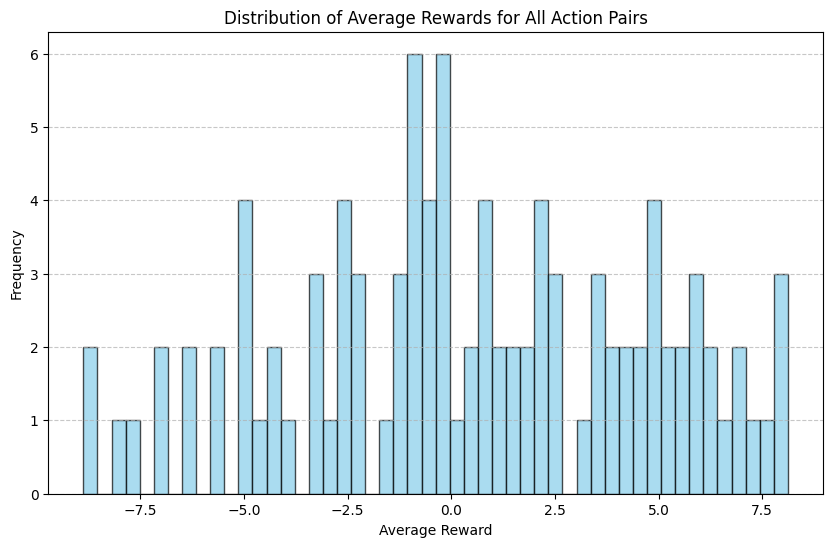

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt

# Calculate average rewards for all action pairs
average_rewards = (payoff_i + payoff_j) / 2

# Flatten the matrix into a list of all possible rewards
all_rewards = average_rewards.ravel()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_rewards, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Rewards for All Action Pairs')
plt.xlabel('Average Reward')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

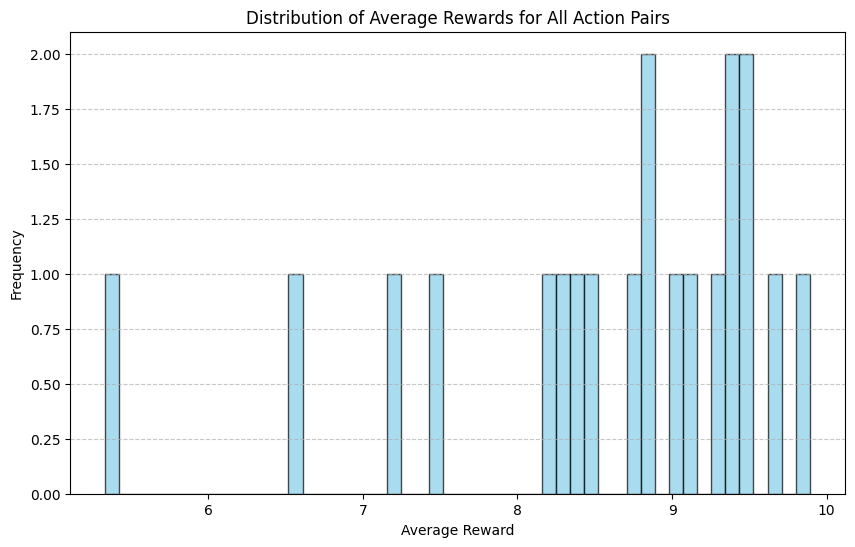

In [ ]:

# Calculate average rewards for all action pairs
max_rewards = np.max([payoff_i, payoff_j], axis = 0)

# Flatten the matrix into a list of all possible rewards
all_rewards = max_rewards.ravel()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_rewards, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Rewards for All Action Pairs')
plt.xlabel('Average Reward')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Actual Run

In [ ]:
from models.model import *
from models.trainer import *

In [ ]:
# Configure the network here
parameters = ParameterSettings(
    n_agents = N_AGENTS,
    d_action = N_ACTIONS, 
    d_obs = env.obs_size, 
    d_traits = 1,
    d_beliefs = 1,
    d_het_latent = 4
)
parameters.device = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(parameters)

In [5]:
equilibriua = find_pure_equilibria(payoff_i, payoff_j)

for eq in equilibriua:
    x, y = eq 
    a = (y[0] + y[1]) / 2

    print(x, a)

(8, 5) 7.076527662697249


In [ ]:
evaluate_policy(model, env, 10)

In [ ]:
# Setup the training loop
training_parameters = TrainingParameters(
    outer_loops = 1_000,
    
    actor_learning_rate= 1e-4,
    critic_learning_rate = 1e-4,
    hypernet_learning_rate = 1e-4,

    hypernet_jsd_threshold = 1.0,

    sampled_agents_proportion = 1.0,
    experience_sampling_steps = 5,
    experience_buffer_size = 25,

    entropy_coeff = 0.2,

    epsilon_period = 300,
    hypernet_entropy_weight = 0.8, 
    hypernet_diversity_weight= 0.05,
    
    should_train_hypernet = True,
    verbose = True,
)


train_model(model, env, training_parameters)
        

 51%|█████     | 510/1000 [06:26<05:43,  1.43it/s]

# Heterogeneous Baseline

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from use_case.baseline import * 
from tests.eval import *
from models.model import *
from models.trainer import *


In [ ]:
np.random.seed(1337)
torch.manual_seed(1337)

N_AGENTS = 500
N_TYPES = 10
N_ACTIONS = 10
type_payoffs = np.random.uniform(-10, 10, (N_TYPES, N_TYPES, 2, N_ACTIONS, N_ACTIONS))
env = BaselineHeterogeneous(N_AGENTS, N_TYPES, type_payoffs)

In [ ]:
# Configure the network here
parameters = ParameterSettings(
    n_agents = N_AGENTS,
    d_action = N_ACTIONS, 
    d_obs = env.obs_size, 
    d_traits = N_TYPES,
    d_beliefs = 1
    
)
parameters.device = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(parameters)

In [ ]:
# Setup the training loop
training_parameters = TrainingParameters(
    outer_loops = 1_000,
    
    actor_learning_rate= 1e-4,
    critic_learning_rate = 1e-4,
    hypernet_learning_rate = 1e-4,


    hypernet_samples_per_batch =  0.2,
    hypernet_jsd_threshold = 1.0,

    sampled_agents_proportion = 1.0,
    experience_sampling_steps = 5,
    experience_buffer_size = 25,

    entropy_coeff = 0.2,

    epsilon_period = 300,
    hypernet_entropy_weight = 0.8, 
    hypernet_diversity_weight= 0.05,
    
    should_train_hypernet = True,
    verbose = False
)
train_model(model, env, training_parameters)
